In [1]:
import pandas as pd


companies = pd.read_csv('companies.csv', usecols=["organizationName", "country", "revenue", "profits", "assets", "marketValue"])
companies = companies.rename(columns={'organizationName': 'name'})

In [2]:
 def clean_dataframe(df: pd.DataFrame) -> pd.DataFrame:
        """Cleans the dataframe by removing missing values, duplicates, and converting the 'B' and 'M' values to numbers."""

        # Drop rows with missing values
        df = df.dropna()

        # Drop duplicate rows
        df = df.drop_duplicates()

        # Clean the 'B' values in the specified columns
        def clean_and_convert(value):
            if "B" in value:
                return (
                    float(value.replace(" B", "").replace(",", "")) * 1e9
                )  # Convert to billions
            elif "M" in value:
                return (
                    float(value.replace(" M", "").replace(",", "")) * 1e6
                )  # Convert to millions
            else:
                return float(value.replace(",", ""))

        # Apply the function to clean and convert the 'B' and 'M' values in the specified columns
        columns_to_clean = ["revenue", "profits", "assets", "marketValue"]

        for column in columns_to_clean:
            df[column] = df[column].apply(clean_and_convert)

        return df

In [3]:
companies = clean_dataframe(companies)

companies.head()

,name,country,revenue,profits,assets,marketValue
0,JPMorgan Chase,United States,1.799300e+11,4.180000e+10,3.744300e+12,3.995900e+11
1,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,5.894700e+11,1.563600e+11,6.609900e+11,2.055220e+12
2,ICBC,China,2.167700e+11,5.247000e+10,6.116820e+12,2.030100e+11
3,China Construction Bank,China,2.030800e+11,4.825000e+10,4.977480e+12,1.729900e+11
4,Agricultural Bank of China,China,1.861400e+11,3.792000e+10,5.356860e+12,1.418200e+11


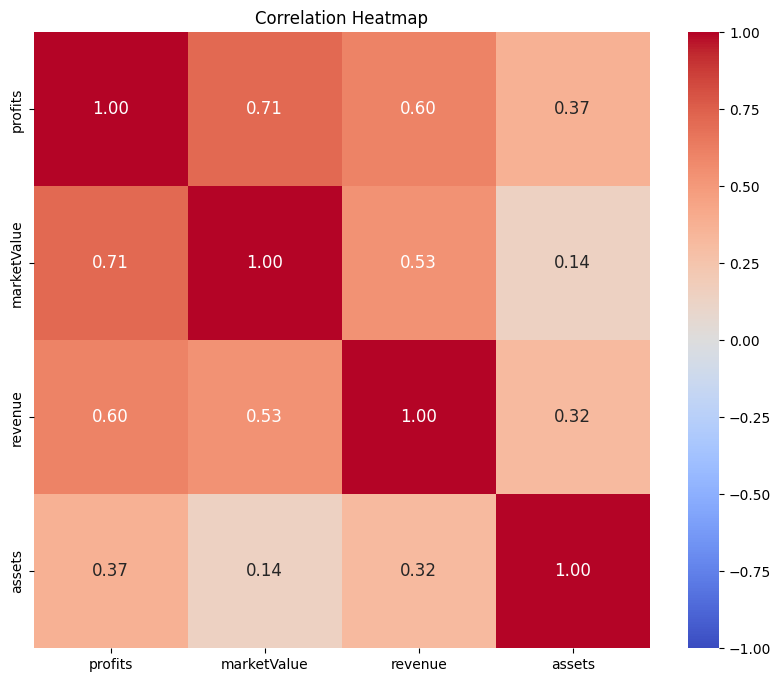

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
corr_matrix = companies[['profits', 'marketValue', 'revenue', 'assets']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, cbar=True, fmt=".2f", annot_kws={"size": 12})

plt.title('Correlation Heatmap')

plt.show()

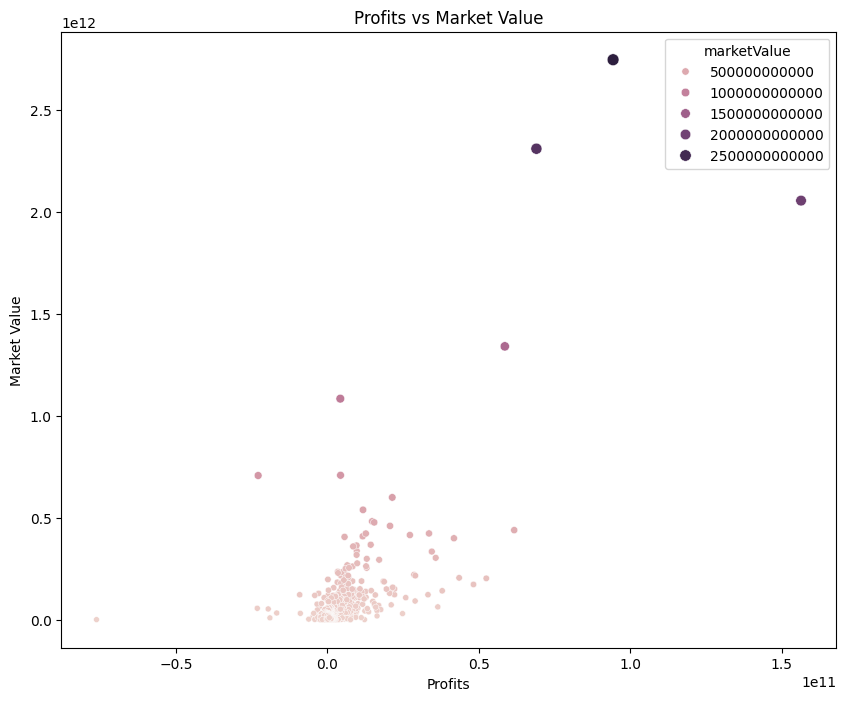

In [5]:
# According to the heatmap, it would be interesting to take a closer look at the correlation between
# profits and market value, since it seams highly correlated

plt.figure(figsize=(10, 8))
sns.scatterplot(data = companies, x = 'profits', y = 'marketValue', hue = 'marketValue', size='marketValue')

plt.title('Profits vs Market Value')
plt.xlabel('Profits')
plt.ylabel('Market Value')

plt.show()

In [6]:
from sklearn.model_selection import train_test_split
# Starting Clustering

X_train, X_test, y_train, y_test = train_test_split(companies[['profits', 'marketValue']],
                                                    companies[['marketValue']],
                                                    test_size=0.33,
                                                    random_state=0
                                                   )

In [7]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

def show_elbow_chart( X_train: np.ndarray, max_clusters: int) -> None:
    """
    Display the chart of the elbow method.

    Parameters
    ----------
    max_clusters : int
        The maximum number of clusters to iterate through.
    
    X_train : np.ndarray
        The training data.

    """
    fits = []
    scores = []
    
    K = range(2, max_clusters + 1)
    
    for k in K:
        # Train the model for the current value of k on training data
        model = KMeans(n_clusters=k, random_state=0, n_init='auto').fit(X_train)
        
        # Append the model to fits
        fits.append(model)

        # Calculate the silhouette score
        score = silhouette_score(X_train, model.labels_, metric='euclidean')
        
        # Append the silhouette score to scores
        scores.append(score)
    
    # Plotting the elbow chart
    plt.plot(K, scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Elbow Method For Optimal k')
    plt.show()

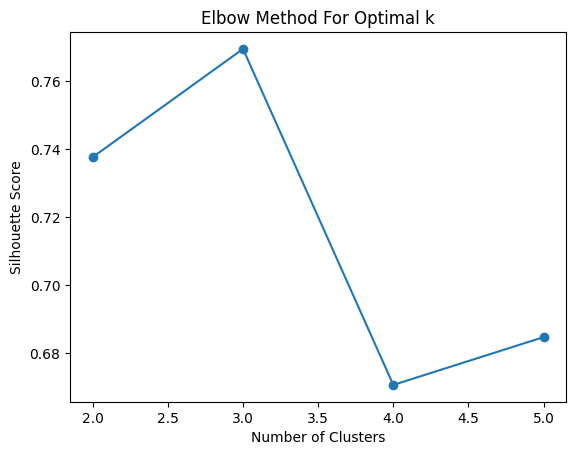

In [9]:
# When applying elbow method, we see that the optimal number of clusters would be 4

show_elbow_chart(X_train_norm, 5)

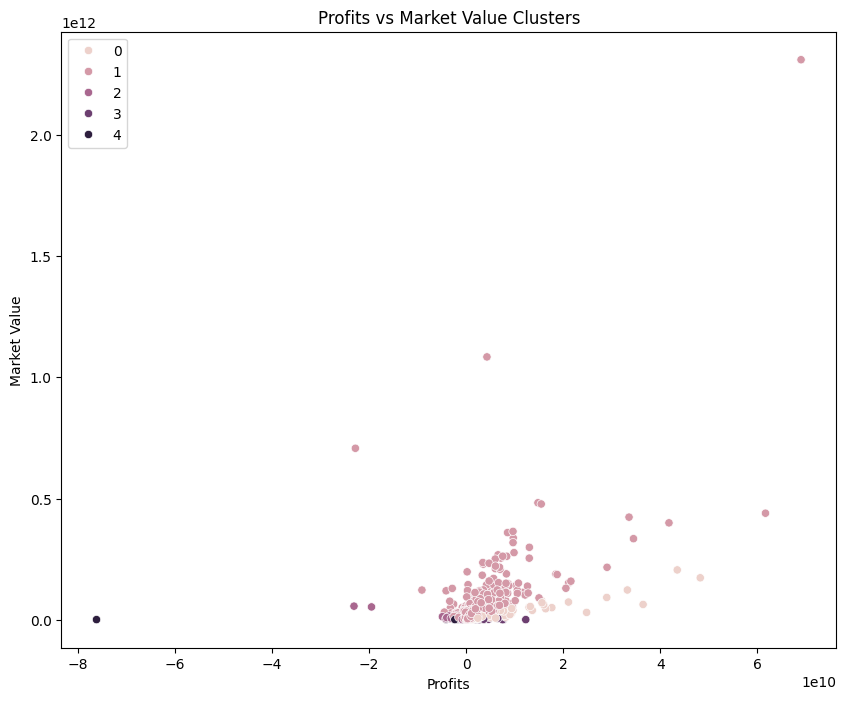

In [13]:
model = KMeans(n_clusters = 5, random_state = 0, n_init='auto').fit(X_train_norm)

plt.figure(figsize=(10, 8))
# 5 CLUSTERS
sns.scatterplot(data = X_train, x = 'profits', y = 'marketValue', hue = model.labels_)

plt.title('Profits vs Market Value Clusters')
plt.xlabel('Profits')
plt.ylabel('Market Value')

plt.show()

In [20]:
def generate_clusters(figure1: str,
                      figure2: str,
                      max_clusters: int = 7,
                      show_elbow: bool = False) -> None:
    
    X_train, X_test, y_train, y_test = train_test_split(companies[[figure1, figure2]],
                                                    companies[[figure2]],
                                                    test_size=0.33,
                                                    random_state=0
                                                   )
    X_train_norm = preprocessing.normalize(X_train)
    X_test_norm = preprocessing.normalize(X_test)

    if show_elbow:
        return show_elbow_chart(X_train_norm, max_clusters)

    
    model = KMeans(n_clusters = max_clusters, random_state = 0, n_init='auto').fit(X_train_norm)

    plt.figure(figsize=(10, 8))
    # 5 CLUSTERS
    sns.scatterplot(data = X_train, x = 'profits', y = 'marketValue', hue = model.labels_)
    
    plt.title('Profits vs Market Value Clusters')
    plt.xlabel('Profits')
    plt.ylabel('Market Value')
    
    plt.show()
    

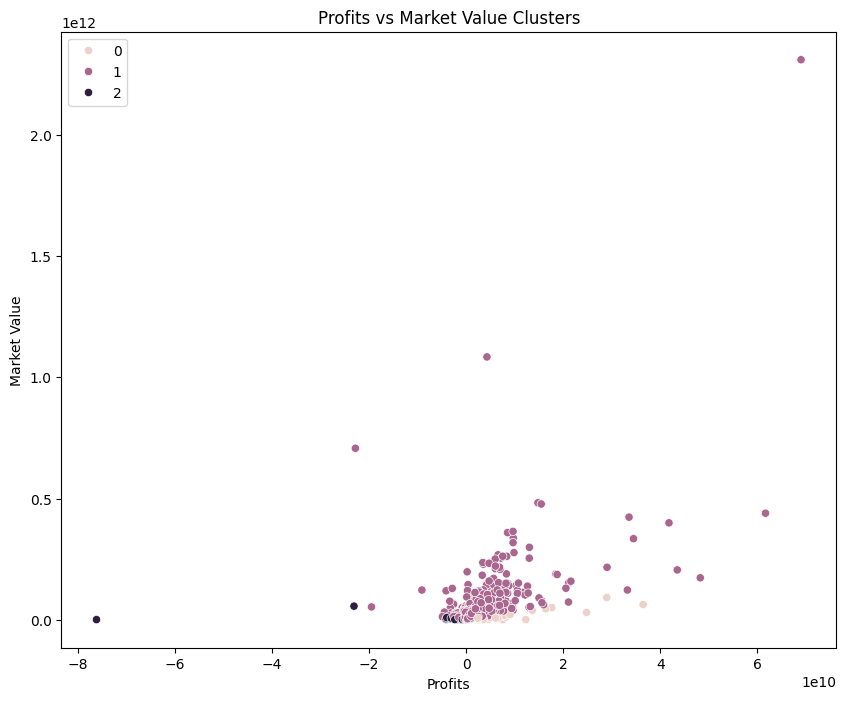

In [24]:
# 3 clusters

generate_clusters('profits', 'marketValue', 3)